In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

Генерация исходных данных

In [2]:
X = np.linspace(0.5, 3.5, 20)
y = 3 + 0.5 * X + np.random.normal(loc=0, scale=0.5, size=X.shape[0])

X = np.c_[X]
y = np.c_[y]

Линейная регрессия

In [3]:
lin_regr = LinearRegression()
lin_regr.fit(X, y)

y_pred_lin_regr = lin_regr.predict(X)

print(f'Коэффициенты линейной регрессии: {float(lin_regr.intercept_), float(lin_regr.coef_)}')

Коэффициенты линейной регрессии: (2.7809246168124466, 0.5837445338252465)


Полиномиальная регрессия

In [4]:
n = 10
poly_regr = Pipeline([
    ('polynomial_features', PolynomialFeatures(n)),
    ('linear_regresstion', LinearRegression())
])

poly_regr.fit(X, y)
X_poly_regr = np.c_[np.linspace(0.5, 3.5, 100)]
y_pred_poly_regr = poly_regr.predict(X_poly_regr)

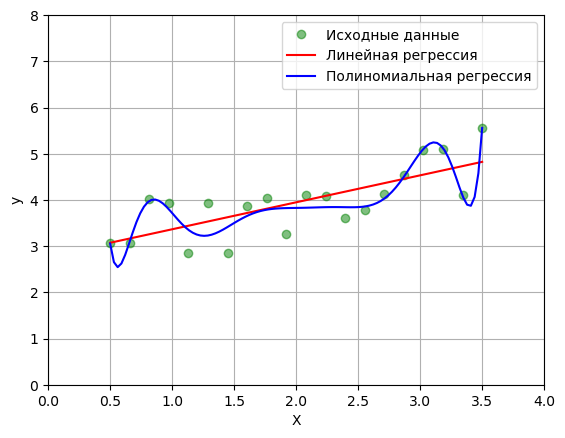

In [5]:
plt.plot(X, y, 'og', alpha = 0.5, label='Исходные данные')
plt.plot(X, y_pred_lin_regr, '-r', label='Линейная регрессия')
plt.plot(X_poly_regr, y_pred_poly_regr, '-b', label='Полиномиальная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim([0, 4])
plt.ylim([0, 8])
plt.grid()
plt.legend()
plt.show()

RMSE для линейной регрессии

In [6]:
mean_squared_error(y, lin_regr.predict(X), squared=False)

0.478628174530476

RMSE для полиномиальной регрессии

In [7]:
mean_squared_error(y, poly_regr.predict(X), squared=False)

0.2935783626979547